<a href="https://colab.research.google.com/github/pdizdar/stock_price_comparision/blob/master/Trending_Ticker_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today's 

In [71]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px

today = pd.Timestamp(datetime.datetime.now())
print(f"Today is {today.day_name()} {today.strftime('%m-%d-%y %H:%M:%S')}")


Today is Saturday 03-18-23 04:45:09


In [73]:
def convert_scale(value):
    if value.endswith('M'):
        return float(value[:-1]) * 10**6
    elif value.endswith('B'):
        return float(value[:-1]) * 10**9
    elif value.endswith('T'):
        return float(value[:-1]) * 10**12
    else:
        return float(value)


In [74]:
# unit test

'''def test_convert_scale_string():
    scale = convert_scale('test')
    print(scale)
    assert scale == 0
    '''
def test_convert_scale_negative():
    scale = convert_scale('-5')
    print(scale)
    assert scale == -5.0

'''def test_convert_scale_M():
    scale = convert_scale('K')
    print(scale)
    assert scale == 0'''

def test_convert_scale_M():
    scale = convert_scale('5M')
    print(scale)
    assert scale == 5000000

'''def test_convert_scale_B():
    scale = convert_scale(f)
    print(scale)
    assert scale == 0'''

def test_convert_scale_B():
    scale = convert_scale('2B')
    print(scale)
    assert scale == 2000000000


In [75]:
#test_convert_scale_string()
test_convert_scale_negative()
test_convert_scale_M()
test_convert_scale_B()



-5.0
5000000.0
2000000000.0


In [76]:
# reading in from a website
most_active = pd.read_html('https://finance.yahoo.com/most-active')[0]
print(most_active.shape)
most_active
#most_active.loc[most_active.Name.str.contains('(?i)Bank', regex=True)]


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,LUMN,"Lumen Technologies, Inc.",2.48,-0.01,-0.40%,212.12M,34.748M,2.483B,NaN,NaN
1,FRC,First Republic Bank,23.03,-11.24,-32.80%,148.941M,13.75M,4.289B,2.54,NaN
2,CS,Credit Suisse Group AG,2.01,-0.15,-6.94%,132.034M,34.219M,7.962B,NaN,NaN
3,TSLA,"Tesla, Inc.",180.13,-4.00,-2.17%,133.197M,182.727M,569.949B,49.35,NaN
4,BAC,Bank of America Corporation,27.82,-1.15,-3.97%,129.87M,48.372M,222.54B,8.59,NaN
5,F,Ford Motor Company,11.30,-0.52,-4.40%,241.383M,68.404M,45.044B,NaN,NaN
6,AAPL,Apple Inc.,155.00,-0.85,-0.55%,98.945M,71.226M,2.452T,25.83,NaN
7,AMD,"Advanced Micro Devices, Inc.",97.84,1.24,+1.28%,94.081M,58.62M,157.658B,105.20,NaN
8,AMZN,"Amazon.com, Inc.",98.95,-1.09,-1.09%,87.3M,70.298M,1.014T,NaN,NaN
9,NVDA,NVIDIA Corporation,257.25,1.84,+0.72%,84.855M,48.988M,641.067B,109.47,NaN


In [77]:
gainers = pd.read_html('https://finance.yahoo.com/gainers')[0]
print(gainers.shape)
gainers


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,IMPJY,Webuild S.p.A.,4.05,0.71,+21.26%,41970,2265,2.04B,NaN,NaN
1,BAIDF,"Baidu, Inc.",17.56,1.96,+12.60%,45110,19904,49.611B,53.21,NaN
2,KDKWF,Kadokawa Corporation,20.07,2.07,+11.50%,20001,322,3.093B,20.91,NaN
3,MSTR,MicroStrategy Incorporated,267.66,26.58,+11.03%,1.985M,647067,3.091B,NaN,NaN
4,COIN,"Coinbase Global, Inc.",74.98,7.20,+10.62%,30.643M,18.604M,19.637B,7.67,NaN
5,GSAT,"Globalstar, Inc.",1.14,0.10,+9.62%,9.49M,3.808M,2.065B,NaN,NaN
6,SYM,Symbotic Inc.,18.72,1.62,+9.47%,2.109M,391603,10.399B,NaN,NaN
7,AKO-B,Embotelladora Andina S.A.,16.04,1.30,+8.78%,28457,43857,2.531B,17.06,NaN
8,HMY,Harmony Gold Mining Company Limited,3.77,0.29,+8.33%,20.371M,4.026M,2.348B,NaN,NaN
9,FDX,FedEx Corporation,220.31,16.26,+7.97%,12.642M,2.276M,55.606B,16.51,NaN


In [78]:
losers = pd.read_html('https://finance.yahoo.com/losers')[0]
print(losers.shape)
losers


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,FRC-PI,First Republic Bank,10.150,-5.470,-35.02%,787252,95231,6.399B,1.29,NaN
1,FRC-PH,First Republic Bank,9.360,-4.650,-33.19%,651323,80964,6.029B,1.19,NaN
2,FRC,First Republic Bank,23.030,-11.240,-32.80%,148.941M,13.75M,4.289B,2.54,NaN
3,GOCO,"GoHealth, Inc.",13.220,-4.280,-24.46%,141426,52139,2.84B,NaN,NaN
4,SRPT,"Sarepta Therapeutics, Inc.",122.690,-26.980,-18.03%,7.413M,1.331M,13.168B,NaN,NaN
5,WAL,Western Alliance Bancorporation,31.320,-5.590,-15.14%,24.089M,4.691M,3.433B,2.83,NaN
6,GTLS,"Chart Industries, Inc.",102.940,-14.550,-12.38%,2.081M,746457,4.398B,58.16,NaN
7,NVCR,NovoCure Limited,57.070,-7.360,-11.42%,1.668M,1.031M,6.791B,NaN,NaN
8,PSNY,Polestar Automotive Holding UK PLC,3.715,-0.455,-10.91%,8.344M,2.486M,8.808B,NaN,NaN
9,UMBF,UMB Financial Corporation,58.270,-7.010,-10.74%,1.703M,305652,2.826B,6.54,NaN


In [79]:
stocks_df = pd.concat([most_active, gainers, losers], ignore_index=True)
print(stocks_df.shape)
print(f'Datatype before the change \n {stocks_df.info()}')
stocks_df



(75, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     object 
 5   Volume             75 non-null     object 
 6   Avg Vol (3 month)  75 non-null     object 
 7   Market Cap         75 non-null     object 
 8   PE Ratio (TTM)     54 non-null     float64
 9   52 Week Range      0 non-null      float64
dtypes: float64(4), object(6)
memory usage: 6.0+ KB
Datatype before the change 
 None


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,LUMN,"Lumen Technologies, Inc.",2.480,-0.010,-0.40%,212.12M,34.748M,2.483B,NaN,NaN
1,FRC,First Republic Bank,23.030,-11.240,-32.80%,148.941M,13.75M,4.289B,2.54,NaN
2,CS,Credit Suisse Group AG,2.010,-0.150,-6.94%,132.034M,34.219M,7.962B,NaN,NaN
3,TSLA,"Tesla, Inc.",180.130,-4.000,-2.17%,133.197M,182.727M,569.949B,49.35,NaN
4,BAC,Bank of America Corporation,27.820,-1.150,-3.97%,129.87M,48.372M,222.54B,8.59,NaN
5,F,Ford Motor Company,11.300,-0.520,-4.40%,241.383M,68.404M,45.044B,NaN,NaN
6,AAPL,Apple Inc.,155.000,-0.850,-0.55%,98.945M,71.226M,2.452T,25.83,NaN
7,AMD,"Advanced Micro Devices, Inc.",97.840,1.240,+1.28%,94.081M,58.62M,157.658B,105.20,NaN
8,AMZN,"Amazon.com, Inc.",98.950,-1.090,-1.09%,87.3M,70.298M,1.014T,NaN,NaN
9,NVDA,NVIDIA Corporation,257.250,1.840,+0.72%,84.855M,48.988M,641.067B,109.47,NaN


In [80]:
stocks_df['PE Ratio (TTM)'] = stocks_df['PE Ratio (TTM)'].fillna(0)
stocks_df.dropna(axis=1, thresh=9, inplace=True)

stocks_df['Volume'] = stocks_df['Volume'].apply(convert_scale)
stocks_df['Avg Vol (3 month)'] = stocks_df['Avg Vol (3 month)'].apply(convert_scale)
stocks_df['Market Cap'] = stocks_df['Market Cap'].apply(convert_scale)
stocks_df['% Change'] = pd.to_numeric(stocks_df['% Change'].replace({'%' : ''}, regex=True))

print(f'Datatypes after the change: {stocks_df.info()}')
stocks_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     float64
 5   Volume             75 non-null     float64
 6   Avg Vol (3 month)  75 non-null     float64
 7   Market Cap         75 non-null     float64
 8   PE Ratio (TTM)     75 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.4+ KB
Datatypes after the change: None


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,LUMN,"Lumen Technologies, Inc.",2.480,-0.010,-0.40,212120000.0,34748000.0,2.483000e+09,0.00
1,FRC,First Republic Bank,23.030,-11.240,-32.80,148941000.0,13750000.0,4.289000e+09,2.54
2,CS,Credit Suisse Group AG,2.010,-0.150,-6.94,132034000.0,34219000.0,7.962000e+09,0.00
3,TSLA,"Tesla, Inc.",180.130,-4.000,-2.17,133197000.0,182727000.0,5.699490e+11,49.35
4,BAC,Bank of America Corporation,27.820,-1.150,-3.97,129870000.0,48372000.0,2.225400e+11,8.59
5,F,Ford Motor Company,11.300,-0.520,-4.40,241383000.0,68404000.0,4.504400e+10,0.00
6,AAPL,Apple Inc.,155.000,-0.850,-0.55,98945000.0,71226000.0,2.452000e+12,25.83
7,AMD,"Advanced Micro Devices, Inc.",97.840,1.240,1.28,94081000.0,58620000.0,1.576580e+11,105.20
8,AMZN,"Amazon.com, Inc.",98.950,-1.090,-1.09,87300000.0,70298000.0,1.014000e+12,0.00
9,NVDA,NVIDIA Corporation,257.250,1.840,0.72,84855000.0,48988000.0,6.410670e+11,109.47


In [81]:
# find if there are any duplicated rows
duplicate = stocks_df[stocks_df.duplicated()]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
52,FRC,First Republic Bank,23.03,-11.24,-32.80,148941000.0,13750000.0,4.289000e+09,2.54
64,USB,U.S. Bancorp,32.95,-3.41,-9.38,56387000.0,10718000.0,5.047200e+10,9.44


In [82]:
stocks_df.drop_duplicates(keep='first', inplace=True)
print(stocks_df.shape)
pd.set_option('display.max_rows', None)
stocks_df




(73, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,LUMN,"Lumen Technologies, Inc.",2.480,-0.010,-0.40,212120000.0,34748000.0,2.483000e+09,0.00
1,FRC,First Republic Bank,23.030,-11.240,-32.80,148941000.0,13750000.0,4.289000e+09,2.54
2,CS,Credit Suisse Group AG,2.010,-0.150,-6.94,132034000.0,34219000.0,7.962000e+09,0.00
3,TSLA,"Tesla, Inc.",180.130,-4.000,-2.17,133197000.0,182727000.0,5.699490e+11,49.35
4,BAC,Bank of America Corporation,27.820,-1.150,-3.97,129870000.0,48372000.0,2.225400e+11,8.59
5,F,Ford Motor Company,11.300,-0.520,-4.40,241383000.0,68404000.0,4.504400e+10,0.00
6,AAPL,Apple Inc.,155.000,-0.850,-0.55,98945000.0,71226000.0,2.452000e+12,25.83
7,AMD,"Advanced Micro Devices, Inc.",97.840,1.240,1.28,94081000.0,58620000.0,1.576580e+11,105.20
8,AMZN,"Amazon.com, Inc.",98.950,-1.090,-1.09,87300000.0,70298000.0,1.014000e+12,0.00
9,NVDA,NVIDIA Corporation,257.250,1.840,0.72,84855000.0,48988000.0,6.410670e+11,109.47


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

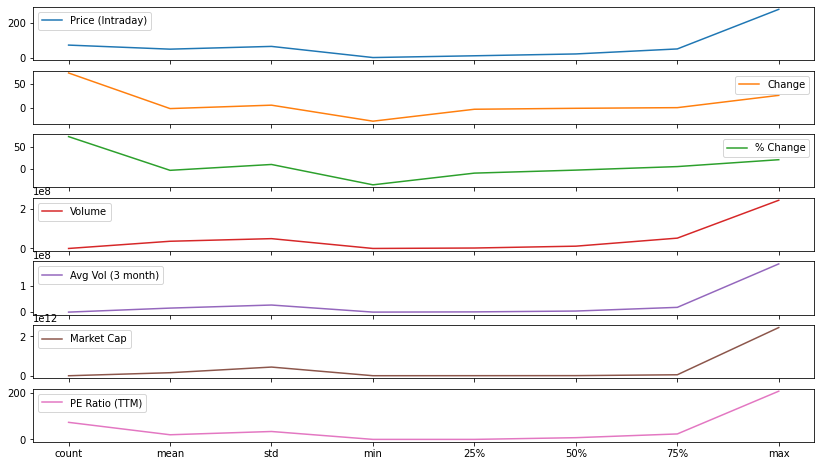

In [83]:

stocks_df.describe().plot(subplots=True, figsize=(14,8))

In [84]:
# find all rows that have 'Corp' in its name?
stocks_df.loc[stocks_df.Name.str.contains('(?i)Bank', regex=True)]

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
1,FRC,First Republic Bank,23.03,-11.24,-32.80,148941000.0,13750000.0,4.289000e+09,2.54
4,BAC,Bank of America Corporation,27.82,-1.15,-3.97,129870000.0,48372000.0,2.225400e+11,8.59
50,FRC-PI,First Republic Bank,10.15,-5.47,-35.02,787252.0,95231.0,6.399000e+09,1.29
51,FRC-PH,First Republic Bank,9.36,-4.65,-33.19,651323.0,80964.0,6.029000e+09,1.19


In [85]:
volume_change = stocks_df.query('Volume >= 20000000 and Change <= -5')
volume_change

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
1,FRC,First Republic Bank,23.03,-11.24,-32.80,148941000.0,13750000.0,4.289000e+09,2.54
55,WAL,Western Alliance Bancorporation,31.32,-5.59,-15.14,24089000.0,4691000.0,3.433000e+09,2.83


In [86]:
stocks_df.query('`% Change` < -50')[['Name', '% Change']]

,Name,% Change


In [87]:

Symbol_s = stocks_df.loc[(stocks_df['PE Ratio (TTM)']>=19) & (stocks_df['Change']<= -5) & (stocks_df['Symbol'].str.startswith('S')),['Symbol', 'Name']]
Symbol_s

,Symbol,Name


In order to filter a DataFrame column that has spaces with the query method, we wrap the column using backticks. While this may not look great, it does allow us to use any column in the method.

In [88]:
large_market_cap = stocks_df.query("`Market Cap` > 200000000000")
large_market_cap.head()



,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
3,TSLA,"Tesla, Inc.",180.13,-4.00,-2.17,133197000.0,182727000.0,5.699490e+11,49.35
4,BAC,Bank of America Corporation,27.82,-1.15,-3.97,129870000.0,48372000.0,2.225400e+11,8.59
6,AAPL,Apple Inc.,155.00,-0.85,-0.55,98945000.0,71226000.0,2.452000e+12,25.83
8,AMZN,"Amazon.com, Inc.",98.95,-1.09,-1.09,87300000.0,70298000.0,1.014000e+12,0.00
9,NVDA,NVIDIA Corporation,257.25,1.84,0.72,84855000.0,48988000.0,6.410670e+11,109.47


In [89]:
top_5_company = stocks_df.nlargest(5,['Volume'])
top_5_company


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
5,F,Ford Motor Company,11.30,-0.52,-4.40,241383000.0,68404000.0,4.504400e+10,0.00
0,LUMN,"Lumen Technologies, Inc.",2.48,-0.01,-0.40,212120000.0,34748000.0,2.483000e+09,0.00
1,FRC,First Republic Bank,23.03,-11.24,-32.80,148941000.0,13750000.0,4.289000e+09,2.54
3,TSLA,"Tesla, Inc.",180.13,-4.00,-2.17,133197000.0,182727000.0,5.699490e+11,49.35
2,CS,Credit Suisse Group AG,2.01,-0.15,-6.94,132034000.0,34219000.0,7.962000e+09,0.00


In [90]:
top_5_volume = (top_5_company.Symbol).to_list()
top_5_volume

['F', 'LUMN', 'FRC', 'TSLA', 'CS']

In [91]:
ticker = yf.download(top_5_volume, period='1y',interval='1d', ignore_tz=True, progress=False, auto_adjust=False, actions='inline' )
ticker.info()
ticker.head()
pd.set_option('display.max_columns', None)
ticker.head()
#ticker.to_csv('ticker.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-18 to 2023-03-17
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, CS)       251 non-null    float64
 1   (Adj Close, F)        251 non-null    float64
 2   (Adj Close, FRC)      251 non-null    float64
 3   (Adj Close, LUMN)     251 non-null    float64
 4   (Adj Close, TSLA)     251 non-null    float64
 5   (Close, CS)           251 non-null    float64
 6   (Close, F)            251 non-null    float64
 7   (Close, FRC)          251 non-null    float64
 8   (Close, LUMN)         251 non-null    float64
 9   (Close, TSLA)         251 non-null    float64
 10  (Dividends, CS)       251 non-null    float64
 11  (Dividends, F)        251 non-null    float64
 12  (Dividends, FRC)      251 non-null    float64
 13  (Dividends, LUMN)     251 non-null    float64
 14  (Dividends, TSLA)     251 non-null    float64
 15  (Hig

Adj Close                                               Close  \
                  CS          F         FRC       LUMN        TSLA    CS   
Date                                                                       
2022-03-18  8.020674  15.438364  169.184067  10.612164  301.796661  8.15   
2022-03-21  8.010833  15.090405  166.524918  10.487765  307.053345  8.14   
2022-03-22  8.119087  15.648972  169.203934  10.487765  331.326660  8.25   
2022-03-23  7.961626  15.273541  163.349823  10.401643  333.036682  8.09   
2022-03-24  7.991150  15.410893  164.917542  10.420781  337.973328  8.12   

                                                     Dividends                 \
                    F         FRC   LUMN        TSLA        CS    F  FRC LUMN   
Date                                                                            
2022-03-18  16.860001  170.509995  11.09  301.796661       0.0  0.0  0.0  0.0   
2022-03-21  16.480000  167.830002  10.96  307.053345       0.0  0.0  0.0  0.0   
2022-03-22  17.090000  170.529999  10.96  331.326660       0.0  0.0  0.0  0.0   
2022-03-23  16.680000  164.630005  10.87  333.036682       0.0  0.0  0.0  0.0   
2022-03-24  16.830000  166.210007  10.89  337.973328       0.0  0.0  0.0  0.0   

                 High                                             Low  \
           TSLA    CS          F         FRC   LUMN        TSLA    CS   
Date                                                                    
2022-03-18  0.0  8.16  16.900000  171.500000  11.15  302.616669  7.91   
2022-03-21  0.0  8.19  17.110001  171.100006  11.25  314.283325  8.06   
2022-03-22  0.0  8.35  17.309999  174.210007  11.09  332.619995  8.23   
2022-03-23  0.0  8.20  17.049999  169.259995  11.14  346.899994  8.07   
2022-03-24  0.0  8.14  16.980000  167.089996  10.95  341.496674  8.01   

                                                      Open             \
                    F         FRC   LUMN        TSLA    CS          F   
Date                                                                    
2022-03-18  16.280001  166.289993  10.78  289.130005  7.91  16.420000   
2022-03-21  16.330000  165.800003  10.92  302.363342  8.16  16.870001   
2022-03-22  16.700001  168.570007  10.81  307.250000  8.24  16.719999   
2022-03-23  16.570000  163.529999  10.83  325.466675  8.09  16.820000   
2022-03-24  16.639999  163.899994  10.79  329.600006  8.05  16.740000   

                                          Stock Splits                      \
                   FRC   LUMN        TSLA           CS    F  FRC LUMN TSLA   
Date                                                                         
2022-03-18  168.500000  10.87  291.496674          0.0  0.0  0.0  0.0  0.0   
2022-03-21  170.369995  11.10  304.993347          0.0  0.0  0.0  0.0  0.0   
2022-03-22  169.449997  11.03  310.000000          0.0  0.0  0.0  0.0  0.0   
2022-03-23  168.309998  10.98  326.646667          0.0  0.0  0.0  0.0  0.0   
2022-03-24  164.330002  10.89  336.576660          0.0  0.0  0.0  0.0  0.0   

              Volume                                          
                  CS         F      FRC      LUMN       TSLA  
Date                                                          
2022-03-18   9640200  89144000  1494300  25454500  100414200  
2022-03-21  11540600  72583600   639700   9575900   81981600  
2022-03-22   8832500  77647100  1557500   9577000  105868500  
2022-03-23   7727800  63296800  1090600   7396500  120676200  
2022-03-24   7632100  56314200   888800   7265700   68920800

In [92]:
'''high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]
high_close'''


"high_close = ticker[ticker[('Close', 'AAPL')] >= ticker[('High', 'AMZN')]]\nhigh_close"

In [93]:
close = ticker.Close
close.info()
close.head()
close.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-18 to 2023-03-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CS      251 non-null    float64
 1   F       251 non-null    float64
 2   FRC     251 non-null    float64
 3   LUMN    251 non-null    float64
 4   TSLA    251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


,CS,F,FRC,LUMN,TSLA
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,4.974542,13.474143,138.252988,8.247968,235.104516
std,1.580604,1.558582,22.736885,2.929266,62.742564
min,2.010000,10.950000,23.030001,2.480000,108.099998
25%,3.480000,12.200000,123.220001,5.480000,190.924995
50%,5.070000,13.180000,140.880005,8.820000,233.000000
75%,5.920000,14.700000,154.089996,10.960000,288.360001
max,8.250000,17.750000,170.529999,12.500000,381.816681


In [94]:
fig = px.line(close, title=f"Top 5 Companies with largest volume on {today} for last 3y") 
fig.show()

                 CS             F           FRC          LUMN          TSLA
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02
mean   2.104453e+07  6.408884e+07  4.322238e+06  2.036476e+07  1.080675e+08
std    3.165700e+07  2.479173e+07  2.002679e+07  2.373238e+07  4.965854e+07
min    6.607100e+06  1.298090e+07  4.135000e+05  5.334800e+06  4.186470e+07
25%    1.189090e+07  5.049385e+07  8.750500e+05  9.600050e+06  7.205490e+07
50%    1.565060e+07  5.878260e+07  1.221300e+06  1.573920e+07  9.215070e+07
75%    2.066315e+07  7.373620e+07  1.597750e+06  2.337870e+07  1.389452e+08
max    4.341040e+08  2.497841e+08  1.960800e+08  3.159433e+08  3.065906e+08


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

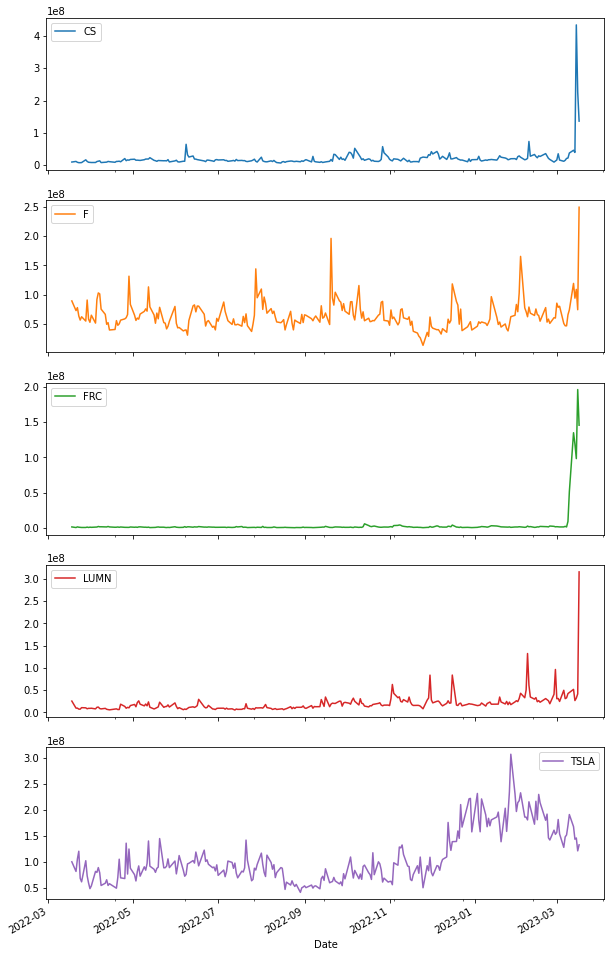

In [95]:
volume = ticker.Volume
volume

print(volume.describe())
volume.plot(subplots=True, figsize=(10,18))


In [96]:
high = ticker.High
high.to_csv('high.csv')
figure = px.bar(high)
figure.show()

In [97]:
low = ticker.Low.to_csv('low.csv')
figure = px.line(ticker.Low)
figure.show()

In [98]:
high1 = px.box(ticker.High)
high1.show()
high.describe()

,CS,F,FRC,LUMN,TSLA
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,5.058526,13.702430,140.454223,8.405578,241.383612
std,1.595258,1.580739,21.936594,2.943335,63.968727
min,2.100000,11.210000,30.010000,2.550000,111.750000
25%,3.530000,12.420000,125.219997,5.635000,195.809998
50%,5.160000,13.460000,142.429993,8.920000,239.316666
75%,6.000000,14.965000,155.860001,11.115000,296.699997
max,8.350000,17.799999,174.210007,12.540000,384.290009


In [99]:

dividend = ticker.Dividends
dividend



,CS,F,FRC,LUMN,TSLA
Date,,,,,
2022-03-18,0.000,0.00,0.00,0.00,0.0
2022-03-21,0.000,0.00,0.00,0.00,0.0
2022-03-22,0.000,0.00,0.00,0.00,0.0
2022-03-23,0.000,0.00,0.00,0.00,0.0
2022-03-24,0.000,0.00,0.00,0.00,0.0
2022-03-25,0.000,0.00,0.00,0.00,0.0
2022-03-28,0.000,0.00,0.00,0.00,0.0
2022-03-29,0.000,0.00,0.00,0.00,0.0
2022-03-30,0.000,0.00,0.00,0.00,0.0


In [100]:
High_Low = ticker.loc[:, ['High', 'Low' ]]
High_Low.head()
High_Low.max()
#High_Low.plot(subplots=True, figsize=(10,10))
#ax = High_Low.unstack(level=0).plot(figsize=(14,6))

High  CS        8.350000
      F        17.799999
      FRC     174.210007
      LUMN     12.540000
      TSLA    384.290009
Low   CS        8.230000
      F        17.200001
      FRC     168.570007
      LUMN     12.180000
      TSLA    362.433319
dtype: float64